<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_06_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* **Part 6.1: Using Convolutional Neural Networks**
* Part 6.2: Using Pretrained Neural Networks with Keras
* Part 6.3: Looking at Keras Generators and Image Augmentation


# **WARNING!**

You **must** change your runtime type to use either a GPU or a TPU.  

##### **GPU (Graphics Processing Unit)** and **TPU (Tensor Processing Unit)** are specialized hardware accelerators designed to handle the intense computation required for neural network training.

### **GPU**
* Originally designed for rendering graphics, GPUs are highly parallel, meaning they can perform many calculations simultaneously. This parallelism makes them well-suited for the matrix operations and vectorized calculations common in deep learning.

* Widely used in both academia and industry due to their versatility and high performance.

### **TPU**
* Developed by Google specifically for machine learning tasks. TPUs are designed to accelerate training and inference of deep learning models.

* Optimized for TensorFlow, offering a performance boost over traditional GPUs, especially for large-scale training.

Both GPUs and TPUs significantly speed up the training process of neural networks by efficiently handling the massive amounts of data and complex calculations required. Faster training means quicker iterations and shorter times to achieve model improvements, making these accelerators crucial for cutting-edge AI development.

### **How to Change Runtime Type**

It is important to change your runtime type **_BEFORE_**  you begin working on this lesson. That's because when you change your runtime type, all the previous work is erased!

To change your runtime type, select **Runtime** on the main toolbar and then select **Change runtime type**

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image20.png)


Which GPU or TPU selections that you can choose from change from time to time as new accelerators are developed. More importantly, your choice(s) depend on whether you are using a paid membership subscription or a free account.

Here are the current choices for a paid membership as of 2024:

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image21.png)

For this lesson, I recommend you choose the `Al00 GPU`. However, you will need to select something other than `CPU` or you will have to wait _hours_ for your neural networks to train.

Once you have pressed the `Save` button, you can continue with this lesson.

### Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [4]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    #%tensorflow_version 2.x
    #print(f"Tensorflow version: {tf.__version__}")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


### System Check

Run the code in the cell below to check your current runtime environment.

In [6]:
# System Check: YOU MUST RUN THIS CELL SECOND

import tensorflow as tf

print(f"Tensorflow version: {tf.__version__}")

# Check for GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print(f'GPU: {gpu}')
        runtime_OK = True
else:
    print('No GPU found')
    runtime_OK = False

# Check for TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print(f'TPU: {tpu.master()}')
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    runtime_OK = True
except ValueError:
    print('')

if runtime_OK:
  print("You're good to go!")
else:
  print("YOU HAVEN'T SELECTED A GPU OR TPU RUNTIME!")
  print("You need to change your runtime type beore you continue.")

Tensorflow version: 2.17.0
No GPU found

YOU HAVEN'T SELECTED A GPU OR TPU RUNTIME!
You need to change your runtime type beore you continue.


### Record your specific GPU/TPU accelerator

To faciliate grading of your homework, it is important that you specify which hardware accelerator you are using. Unfornuately, this has to be done manually since there is no other way to get this information.

In the cell below there is a Python dictionary called `my_GPU_dict`. Below the dictionary is the code fragment:

~~~text
# Enter the correct key number in the square brackets [ ]
my_GPU = my_GPU_dict[ ]
~~~

Before you can continue, you must place a number within the square brackets corresponding to your selected GPU or TPU. For example, if you are using the recommended `A100 GPU` you would enter the number `2` in the square brackets and then run the cell.

In [1]:
# Record your current Runtime GPU/TPU


# List of Current GPU/TPUs
my_GPU_dict = {
    1: 'CPU',
    2: 'A100 GPU',
    3: 'L4 GPU',
    4: 'T4 GPU',
    5: 'TPU v2-8'
}

# Enter the correct key number in the square brackets [ ]
my_GPU = my_GPU_dict[ 1]

# Print selection
print(f"My current runtime GPU/TPU is: {my_GPU}")

My current runtime GPU/TPU is: CPU


If the code is correct, you should see something like the following:

~~~text
print(f"My current runtime GPU/TPU is: {my_GPU}")
~~~

You will receive an error is don't enter a number.

### Define functions

The cell below creates several functions that are needed for this lesson. If you don't run this cell, you will receive errors later when you try to run some cells.

In [2]:
# Create functions for this lesson

import tensorflow as tf
import psutil
import os

def check_current_ram():
  ram = psutil.virtual_memory()
  print(f"Available RAM: {ram.available / (1024 ** 3):.2f} GB")

def list_files():
   files = os.listdir('.')
   print(files)

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# **Part 6.1: Keras Neural Networks for Medical MNIST**

This module will focus on computer vision. There are some important differences and similarities with previous neural networks.

* We will usually use classification, though regression is still an option.
* The input to the neural network is now 3D (height, width, _and_ color)
* Data are not transformed; no more Z-scores or dummy variables.
* Processing time is **_much_**  longer.
* We now have different layer types. Besides dense layers, we now have _convolution layers_, and _max-pooling layers_.
* Data will no longer arrive as tabular data stored in CSV files, but as hundred or even thousands of **_images_**.


## Common Computer Vision Data Sets

There are many data sets for computer vision. Two of the most popular classic datasets are the MNIST digits data set and the CIFAR image data sets. We will be using two MNIST data sets in this lesson. It is important to be familiar with both sets, neural network texts often refer to them.

The [MNIST Digits Data Set](http://yann.lecun.com/exdb/mnist/) is very popular in the neural network research community. You can see a sample of it in Figure 6.MNIST.

**Figure 6.MNIST: MNIST Data Set**
![MNIST Data Set](https://biologicslab.co/BIO1173/images/class_8_mnist.png "MNIST Data Set")

The original MNIST Digit Data Set is a large database of handwritten digits that is commonly used for training various image processing systems. It was created by Yan LeCun, Corinna Cortes, and Christopher Burges as a benchmark for evaluating machine learning algorithms in the field of computer vision. The dataset was first released in 1998 and consists of 60,000 training images and 10,000 testing images of handwritten digits from 0 to 9.

The MNIST dataset has been widely used in the research community to develop and test classification algorithms, particularly in the field of deep learning. It has become a standard benchmark for evaluating the performance of machine learning models on image recognition tasks. Despite its simplicity, the MNIST dataset remains popular due to its ease of use and ability to quickly assess the effectiveness of new algorithms.

Over the years, the MNIST dataset has been used in numerous research studies and competitions, leading to the development of more advanced techniques in computer vision. It continues to be a valuable resource for researchers and practitioners in the field of machine learning.

[MedMINST Data Sets](https://medmnist.com/) are a collection of 18 standardized biomedical datasets produced by a consortium of researchers at Harvard University and colaborators in Germany and China. The image sets cover a variety medical tissues and cell types including Chest X-Rays, Colon Pathology, Breast Ultrasound, Blood Cytology and Abdominal CT scans. The `RetinaMINST` dataset has 1,600 fundus camera samples (1,080 training, 120 validation, 400 test).

**Figure 6.MedMNIST: RetinaMNIST Data Set**
![RetinaMNIST](https://biologicslab.co/BIO1173/images/class_06/RetinaMNIST.jpg "RetinaMNIST")

The [CIFAR-10 and CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) datasets are also frequently used by the neural network research community.

**Figure 6.CIFAR: CIFAR Data Set**
![CIFAR Data Set](https://biologicslab.co/BIO1173/images/class_8_cifar.png "CIFAR Data Set")

The CIFAR-10 data set contains low-rez images that are divided into 10 classes. The CIFAR-100 data set contains 100 classes in a hierarchy.

# **Convolutional Neural Networks (CNNs)**

The convolutional neural network (CNN) is a neural network technology that has profoundly impacted the area of computer vision (CV). Fukushima  (1980) [[Cite:fukushima1980neocognitron]](https://www.rctn.org/bruno/public/papers/Fukushima1980.pdf) introduced the original concept of a convolutional neural network, and   LeCun, Bottou, Bengio & Haffner (1998) [[Cite:lecun1995convolutional]](http://yann.lecun.com/exdb/publis/pdf/lecun-bengio-95a.pdf) greatly improved this work. From this research, Yan LeCun introduced the famous LeNet-5 neural network architecture. This chapter follows the **_LeNet-5 style_** of convolutional neural network. Although computer vision primarily uses CNNs, this technology has some applications outside of the field. You need to realize that if you want to utilize CNNs on non-visual data, you must find a way to encode your data to mimic the properties of visual data.  

The order of the input array elements is _crucial_ to the training. In contrast, most neural networks that are not CNNs, treat their input data as a long vector of values. The order in which you arrange the incoming features in this vector is irrelevant. Importantly, you **can't** change the order of the data in these vectors for these types of neural networks once your network has been trained.

On the other hand, the CNN network arranges the inputs into a **_grid_**. This arrangement works well with images because the pixels in closer proximity to each other are important to each other. The order of pixels in an image is significant. The human body is a relevant example of this type of order. For the design of the face, we are accustomed to eyes being near to each other.

This advance in CNNs is due to years of research on biological eyes. In other words, CNNs utilize overlapping fields of input to simulate features of biological eyes. Until this breakthrough, AI had been unable to reproduce the capabilities of biological vision.

Scale, rotation, and noise have presented challenges for AI computer vision research. You can observe the complexity of biological eyes in the example that follows.

A friend raises a sheet of paper with a large number written on it. As your friend moves nearer to you, the number is still identifiable. In the same way, you can still identify the number when your friend rotates the paper. Lastly, your friend creates noise by drawing lines on the page, but you can still identify the number.

As you can see, these examples demonstrate the high function of the biological eye and allow you to understand better the research breakthrough of CNNs. That is, this neural network can process scale, rotation, and noise in the field of computer vision. You can see this network structure in Figure 6.LENET.

**Figure 6.LENET: A LeNET-5 Network (LeCun, 1998)**
![A LeNET-5 Network](https://biologicslab.co/BIO1173/images/class_8_lenet5.png "A LeNET-5 Network")

So far, we have only seen one layer type (dense layers). By the end of this course you will also know about:
  
* **Convolution Layers** - Used to scan across images.
* **Max Pooling Layers** - Used to downsample images.
* **Dropout Layers** - Used to add regularization.
* **LSTM and Transformer Layers** - Used for time series data.


## **Convolution Layers**

The first layer that we will examine is the convolutional layer. We will begin by looking at the hyper-parameters that you must specify for a convolutional layer in most neural network frameworks that support the CNN:

* Number of filters
* Filter Size
* Stride
* Padding
* Activation Function/Non-Linearity

The primary purpose of a convolutional layer is to detect features such as edges, lines, blobs of color, and other visual elements. The filters can detect these features. The more filters we give to a convolutional layer, the more features it can see.

A filter is a square-shaped object that scans over the image. A grid can represent the individual pixels of a grid. You can think of the convolutional layer as a smaller grid that sweeps left to right over each image row. There is also a hyperparameter that specifies both the width and height of the square-shaped filter. The following figure shows this configuration in which you see the six convolutional filters sweeping over the image grid:

A convolutional layer has weights between it and the previous layer or image grid. Each pixel on each convolutional layer is a weight. Therefore, the number of weights between a convolutional layer and its predecessor layer or image field is the following:

```
[FilterSize] * [FilterSize] * [# of Filters]
```

For example, if the filter size were 5 (5x5) for 10 filters, there would be 250 weights.

You need to understand how the convolutional filters sweep across the previous layer's output or image grid. Figure 6.CNN illustrates the sweep:

**Figure 6.CNN: Convolutional Neural Network**
![Convolutional Neural Network](https://biologicslab.co/BIO1173/images/class_8_cnn_grid.png "Convolutional Neural Network")

The above figure shows a convolutional filter with 4 and a padding size of 1. The **_padding size_** is responsible for the border of zeros in the area that the filter sweeps. Even though the image is 8x7, the extra padding provides a virtual image size of 9x8 for the filter to sweep across. The **_stride_** specifies the number of positions the convolutional filters will stop. The convolutional filters move to the right, advancing by the number of cells specified in the stride. Once you reach the far right, the convolutional filter moves back to the far left; then, it moves down by the stride amount and continues to the right again.

Some constraints exist concerning the size of the stride. The stride cannot be `0`. The convolutional filter would never move if you set the stride to `0`. Furthermore, neither the stride nor the convolutional filter size can be larger than the previous grid. There are additional constraints on the stride (*s*), padding (*p*), and the filter width (*f*) for an image of width (*w*). Specifically, the convolutional filter must be able to start at the far left or top border, move a certain number of strides, and land on the far right or bottom border. The following equation shows the number of steps a convolutional operator
must take to cross the image:

$$ steps = \frac{w - f + 2p}{s}+1 $$

The number of steps must be an integer. In other words, it cannot have decimal places. The purpose of the padding (*p*) is to be adjusted to make this equation become an integer value.


### **Max Pooling Layers**

Max-pool layers downsample a 3D box to a new one with smaller dimensions. Typically, you can always place a max-pool layer immediately following the convolutional layer. The LENET shows the max-pool layer immediately after layers C1 and C3. These max-pool layers progressively decrease the size of the dimensions of the 3D boxes passing through them. This technique can avoid overfitting (Krizhevsky, Sutskever & Hinton, 2012).

A pooling layer has the following hyper-parameters:

* Spatial Extent (*f*)
* Stride (*s*)

Unlike convolutional layers, max-pool layers do not use padding. Additionally, max-pool layers have no weights, so training does not affect them. These layers downsample their 3D box input. The 3D box output by a max-pool layer will have a width equal to this equation:

$$ w_2 = \frac{w_1 - f}{s} + 1 $$

The height of the 3D box produced by the max-pool layer is calculated similarly with this equation:

$$ h_2 = \frac{h_1 - f}{s} + 1 $$

The depth of the 3D box produced by the max-pool layer is equal to the depth the 3D box received as input. The most common setting for the hyper-parameters of a max-pool layer is f=2 and s=2. The spatial extent (f) specifies that boxes of 2x2 will be scaled down to single pixels. Of these four pixels, the pixel with the maximum value will represent the 2x2 pixel in the new grid. Because squares of size 4 are replaced with size 1, 75% of the pixel information is lost. The following figure shows this transformation as a 6x6 grid becomes a 3x3:

**Figure 6.MAXPOOL: Max Pooling Layer**
![Max Pooling Layer](https://biologicslab.co/BIO1173/images/class_8_conv_maxpool.png "Max Pooling Layer")

Of course, the above diagram shows each pixel as a single number. A grayscale image would have this characteristic. We usually take the average of the three numbers for an RGB image to determine which pixel has the maximum value.

----------------------------------------
### **Supervised _vs_ Unsupervised Machine Learning**

In **_supervised machine learning_**, the algorithm is trained on a _labeled_ dataset, where each training example is paired with the correct output. The goal is to learn a mapping from input features to the corresponding output labels. During training, the algorithm adjusts its parameters to minimize the difference between the predicted output and the true label. Once the model is trained, it can make predictions on new, unseen data by applying the learned mapping. Common supervised learning tasks include classification and regression.

On the other hand, **_unsupervised machine learning_** involves training the algorithm on an _unlabeled_ dataset, where the algorithm must find patterns or relationships in the data without explicit guidance. The goal of unsupervised learning is to discover hidden structures or clusters in the data. This type of learning is often used for tasks such as clustering, anomaly detection, and dimensionality reduction. Unlike supervised learning, there are no explicit output labels to guide the learning process in unsupervised learning.

---------------------------------------------

## **Classification Convolutional Neural Networks**

We will now look at an example of a  classification meural network. For _supervised_ computer vision, your dataset will need some labels. For classification, this label usually specifies _what_ the image is a picture of, e.g., dog, cat, carcinoma, etc.

For a classification neural network, we will provide an image and expect the neural network to classify it as being one of several posibilites. We will use the `bloodmnist_224` dataset that contains images of 8 different types of blood cells.

Here are images showing the 8 types of blood cells in the `bloodmnist_224` dataset

![___](https://biologicslab.co/BIO1173/images/class_06/BloodCellTypes_A.png)

Each image is 244 X 244 pixels with 3 color channels (RGB).

Our goal will be to create a convolutional neural network (CNN) that can classify a blood cell image into one of these 8 blood cell type classifications.


### **Step - 1: Setup Evironmental Variables**

**_Environmental variables_** are like hidden settings that tell your computer how to behave. They hold information that can affect how programs run on your system, such as paths to files, system directories, or user-specific settings. It's like setting the stage for your computer to know where to find all its props and scripts.

The code in the cell below creates environmental variables that are needed to download a specific datafile and then to extract this data into specific folders in your Colab notebook.

In [10]:
# Step - 1: Setup Environmental Variables

import os

# Define datafile location
URL = "https://biologicslab.co/BIO1173/data"
DOWNLOAD_SOURCE = URL+"/bloodmnist_224.npz"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print(f"DOWNLOAD_SOURCE {DOWNLOAD_SOURCE}")
print(f"DOWNLOAD_NAME {DOWNLOAD_NAME}")

# Define folder locations to store the data
PATH = "/content"
print(f"PATH {PATH}")
EXTRACT_TARGET = os.path.join(PATH,"blood_mnist_224")
SOURCE = os.path.join(EXTRACT_TARGET)             # "crowd_counting")
print(f"EXTRACT_TARGET {EXTRACT_TARGET}")
print(f"SOURCE {SOURCE}")


DOWNLOAD_SOURCE https://biologicslab.co/BIO1173/data/bloodmnist_224.npz
DOWNLOAD_NAME bloodmnist_224.npz
PATH /content
EXTRACT_TARGET /content/blood_mnist_224
SOURCE /content/blood_mnist_224


If the code is correct, you should see the following output:

~~~text
DOWNLOAD_SOURCE https://biologicslab.co/BIO1173/data/bloodmnist_224.npz
DOWNLOAD_NAME bloodmnist_224.npz
PATH /content
EXTRACT_TARGET /content/blood_mnist_224
SOURCE /content/blood_mnist_224
~~~

We are going to download a datafile called `bloodmnist_224.npz` from the course file server. We will then extract (unzip) its contents into a folder called `/content/bloodmnist_224`.

### **Step - 2: Download and Extract Data**

In Step 1 we defined the file we wanted to download and the folder in which to place the data after we unzipped it. In the next cell we perform both the download and the extraction.

#### **Download File**

The code in the cell below uses this code chunk to download the datafile.
~~~text
!wget -O {os.path.join(PATH,DOWNLOAD_NAME)} {DOWNLOAD_SOURCE}
~~~

The program `wget` is a non-interactive network downloader commonly used in Unix-like operating systems. It retrieves files from the web using HTTP, HTTPS, and FTP protocols.

#### **Extract File Contents**

The datafile is compressed (i.e. a `zip file`), so we need to extract the file contents. The next code chunk unzips it to folder specified by the environmental variables defined above:
~~~text
!unzip -o -d {EXTRACT_TARGET} {os.path.join(PATH, DOWNLOAD_NAME)} >/dev/null
~~~
The command `unzip` is a command-line utility used to extract files from a ZIP archive.

At the end of the `unzip` command is `>/dev/null`. Normally, the `unzip` command prints out the name of every file that was extracted. Since there are 2,000 images, we don't want to see this print out. Instead the output is sent instead to `> dev/null` which hids the output. `dev/null` a special file that discards all data written to it—like a black hole for unnecessary or unwanted output. If you send a program’s output to /dev/null, it's basically saying, "I don't need this, just throw it away."

In [11]:
# Step - 2: Download datafile and extract it

print("Downloading files...")
!wget -O {os.path.join(PATH,DOWNLOAD_NAME)} {DOWNLOAD_SOURCE}
!mkdir -p {SOURCE}
!mkdir -p {TARGET}
!mkdir -p {EXTRACT_TARGET}
print(f"Extracting files...", end=' ')
!unzip -o -d {EXTRACT_TARGET} {os.path.join(PATH, DOWNLOAD_NAME)} >/dev/null
print("done.")

--2024-10-27 22:00:47--  https://biologicslab.co/BIO1173/data/bloodmnist_224.npz
Resolving biologicslab.co (biologicslab.co)... 194.163.45.209
Connecting to biologicslab.co (biologicslab.co)|194.163.45.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540731655 (1.4G) [application/octet-stream]
Saving to: ‘/content/bloodmnist_224.npz’

/content/bloodmnist 100%[===================>]   1.43G  12.9MB/s    in 2m 15s  

2024-10-27 22:03:02 (10.9 MB/s) - ‘/content/bloodmnist_224.npz’ saved [1540731655/1540731655]

Extracting files... done.


If the code is correct, you should see the following output:

~~~text
Downloading files...
--2024-10-27 15:05:39--  https://biologicslab.co/BIO1173/data/bloodmnist_224.npz
Resolving biologicslab.co (biologicslab.co)... 194.163.45.209
Connecting to biologicslab.co (biologicslab.co)|194.163.45.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540731655 (1.4G) [application/octet-stream]
Saving to: ‘/content/bloodmnist_224.npz’

/content/bloodmnist 100%[===================>]   1.43G  15.4MB/s    in 68s     

2024-10-27 15:06:48 (21.5 MB/s) - ‘/content/bloodmnist_224.npz’ saved [1540731655/1540731655]

Extracting files... done.
~~~

Image datafiles used by CNN neural networks need to be relatively large which means they take a fair amount of time to download, and then, they require a lot of memory and disk space to store and process. This is one of the main reasons for using Google Colab instead of doing this on your laptop.

### **Step - 3: Load Images and Labels into Numpy arrays**

Image data in dataset can be stored in different formats. In many cases, the image data is stored as individual pictures (frames) in a JPEG format or PNG format.

However, in this dataset, the images are stored in a collect of numpy arrays. The Numpy `.npy` format is a way to save Numpy arrays to disk in a binary file. This format stores the shape, data type, and data of the array efficiently, allowing for fast reading and writing making it perfect for handling large amounts of numerical data in a compact, easy-to-access way.

The code in the cell below reads the images and their corresponding labels using the Numpy command `np.load()` to create 6 numpy arrays containing the `training`, `test` and `validation` images and their labels.   

In [12]:
# Step - 3 Load images and labels into numpy arrays

import numpy as np

# Unpack train_images
train_images = np.load(os.path.join(SOURCE,"train_images.npy"),)
print(f"train_images: {train_images.shape}")
train_labels = np.load(os.path.join(SOURCE,"train_labels.npy"),)
print(f"train_labels: {train_labels.shape}")

# Unpack test_images
test_images = np.load(os.path.join(SOURCE,"test_images.npy"),)
print(f"test_images: {test_images.shape}")
test_labels = np.load(os.path.join(SOURCE,"test_labels.npy"),)
print(f"test_labels: {test_labels.shape}")

# Unpack val_images
val_images = np.load(os.path.join(SOURCE,"val_images.npy"),)
print(f"val_images: {val_images.shape}")
val_labels = np.load(os.path.join(SOURCE,"val_labels.npy"),)
print(f"val_labels: {val_labels.shape}")



train_images: (11959, 224, 224, 3)
train_labels: (11959, 1)
test_images: (3421, 224, 224, 3)
test_labels: (3421, 1)
val_images: (1712, 224, 224, 3)
val_labels: (1712, 1)


If the code is correct, you should see the following output:
~~~text
train_images: (11959, 224, 224, 3)
train_labels: (11959, 1)
test_images: (3421, 224, 224, 3)
test_labels: (3421, 1)
val_images: (1712, 224, 224, 3)
val_labels: (1712, 1)
~~~

**SPLIT DATA**

This MedMNSIT dataset has already been `split` into a training set (`train_images`, `train_labels`), a testing set (`test_images`, `test_labels`) and a validation set (`val_images`, `val_label`). However, in many other image datasets, you will be required to split the image data yourself.

**Image Size**

The image size is given by the array `shape`. For example, here is the output for the train images:

~~~text
train_images: (11959, 224, 224, 3)
~~~

What these `shape` numbers mean is that there is a total of `11959` images in the `train_images` array. Each image is `224` X `224` pixels in size and the last digit, `3`, indicates the images are color images. The 3 stands for the 3 color channels: Red, Green and Blue (RGB).


### **Step - 4: One-Hote Encode Labels**

As you have learned previously, the Y-values for a classification neural network need to be **_One-Hot Encoded_** before they can be processed by a neural network. This is also true for image datasets. In this example, the Y-values are the labels.

The code in the cell below uses the Keras function `to_categorical()` to One-Hot Encode the label information for the training, testing and validation images.

In [13]:
# Step - 4: One-Hot encode labels

from tensorflow.keras.utils import to_categorical
import numpy as np

# Determine the number of classes
classes, counts = np.unique(test_labels, return_counts=True)
class_count = len(classes)
print(f"The label data contains {class_count} classes")

train_labels = to_categorical(train_labels, num_classes=class_count)
test_labels = to_categorical(test_labels, num_classes=class_count)
val_labels = to_categorical(val_labels, num_classes=class_count)

print(f'Train Labels Shape: {train_labels.shape}')
print(f'Test Labels Shape: {test_labels.shape}')
print(f'Validation Labels Shape: {val_labels.shape}')



The label data contains 8 classes
Train Labels Shape: (11959, 8)
Test Labels Shape: (3421, 8)
Validation Labels Shape: (1712, 8)


If the code is correct, you should see the following output:
~~~text
The label data contains 8 classes
Train Labels Shape: (11959, 8)
Test Labels Shape: (3421, 8)
Validation Labels Shape: (1712, 8))
~~~

As you can see, after One-Hot Encoding, there are now 8 classification types.

### **Step - 5: Create and Compile CNN neural network model**

The code in the cell below builds a classic **_Convolutional Neural Network (CNN) model_**.

#### **Create CNN model**

Here is a summary of the model:

1. **Conv2D Layer:** 64 filters, kernel size 3x3, using ReLU activation, input shape is 480x640x3.
2. **MaxPool2D Layer:** Reduces spatial dimensions by a factor of 2.
3. **Conv2D Layer:** 128 filters, kernel size 3x3, using ReLU activation.
4. **MaxPool2D Layer:** Another spatial dimension reduction.
5. **Dropout Layer:** Drops 20% of neurons to prevent overfitting.
6. **Flatten Layer:** Converts the 2D matrix data to a vector.
7. **Dense Layer:** Fully connected layer with 128 neurons, using ReLU activation.
8. **Dense Layer:** Output layer with 8 neurons, one for each category.

#### **Model Compiler**

Here is the code used to compile the model:

~~~text
# Compile model
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
~~~
This code is setting up how the model will learn. It’s basically telling your model how to play a game and how to keep score:

* **loss=keras.losses.CategoricalCrossentropy():** CategoricalCrossentropy is a loss function used in classification tasks where the target labels are one-hot encoded (i.e., each label is represented as a binary vector). It measures the difference between the predicted probability distribution and the true distribution (the one-hot encoded labels). In simpler terms, it penalizes the model more when it assigns higher probabilities to incorrect classes and lower probabilities to the correct class. This helps guide the model to improve its predictions, making it more accurate over time. It's crucial for tasks like image classification, where you need the model to predict distinct classes with high confidence

* **optimizer=keras.optimizers.Adam():** You're using the `Adam` optimizer to adjust the model's weights. `Adam` is known for being efficient and well-suited for large datasets or parameters.

* **metrics=['accuracy']:** Setting metrics=['accuracy'] means that during training, the model will track and display `accuracy` as an evaluation metric. Accuracy is the proportion of correct predictions among the total number of predictions made. It’s a straightforward way to gauge how well your model is performing. So, with metrics=['accuracy'], Keras will show you how often your model’s predictions match the true labels as it trains.

In [14]:
# Step - 5: Construct and Compile CNN neural network

import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Define image size
input_dim = (224, 224, 3)

# Create CNN model
model = Sequential([
    # Input Layer
    Input(shape=input_dim),

    # 1st Convolution layer
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # 2nd Convolution layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    # 3rd Convolution layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    # 4th Convolution layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    # 5th Convolution layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.2),

    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    BatchNormalization(),

    # Output layer has neurons equal to class_count
    Dense(class_count, activation='softmax')
])

# Compile model
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 5, 5, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 64)            │              

 Total params: 924,264 (3.53 MB)

 Trainable params: 922,760 (3.52 MB)

 Non-trainable params: 1,504 (5.88 KB)

If the code is correct, you should see something similar to the following output:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image46.png)



### **Step - 6: Create Callback Monitors**

The code in the cell below creates two different **_callback monitors_**. A Keras callback monitor tracks specific metrics or quantities during the training process and allows you to take action based on their values. It's like having a smart assistant that keeps an eye on how well your model is performing. These callbacks help make the training process more efficient and adaptive by reacting to the monitored metrics in real-time.

#### **Keras Learning Rate Scheduler**

The Keras learning rate scheduler dynamically adjusts the learning rate during training based on a predefined schedule or function. This helps the model converge more efficiently by adapting the learning rate as needed.

Here is the code for the learning rate monitor:
~~~text
# Add learning rate monitor
l_rate_monitor = keras.callbacks.LearningRateScheduler(
                lambda epochs : 1e-6 * 10 ** (epochs/20))
~~~

This code snippet creates a learning rate scheduler to adjust the learning rate during training. Here's a summary:

* **keras.callbacks.LearningRateScheduler:** This callback adjusts the learning rate according to a given schedule.
* **lambda epochs : (epochs/20):** This is the function that defines how the learning rate changes over epochs. It starts with a very low learning rate (1e-8) and increases it exponentially based on the formula:

$$ 1 \times 10^{-6} \cdot 10^{\frac{\text{epochs}}{20}} $$

In essence, this dynamically adjusts the learning rate to help the model converge more efficiently by starting slow and gradually speeding up as training progresses.

#### **Early Stopping**

Here is the early stopping monitor:

~~~text

# Create early stopping monitor
e_stop_monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10,
                 verbose=1, mode='auto', restore_best_weights=True)
~~~

This snippet is configuring the EarlyStopping callback in Keras, which helps prevent overfitting by stopping the training once the model’s performance stops improving. Here's a breakdown:

* **monitor='val_loss':** Watches the validation loss to decide when to stop training.
* **min_delta=1e-3:** The minimum change in the monitored quantity to qualify as an improvement. In this case, 0.001.
* **patience=10:** Number of epochs with no improvement after which training will be stopped. Here, it's set to 10 epochs.
* **verbose=1:** Provides updates in the console about the training process.
* **mode='auto':** Automatically decides if it should look for an increase or decrease in the monitored metric.
* **restore_best_weights=True:** After stopping, the model will revert to the weights that achieved the best validation loss.

In [15]:
# Step - 6: Create callback monitors

import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler


# Create learning rate monitor
l_rate_monitor = keras.callbacks.LearningRateScheduler(lambda epochs : 1e-6 * 10 ** (epochs/20))

# Create early stopping monitor
e_stop_monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10,
                 verbose=1, mode='auto', restore_best_weights=True)

If the code ran correctly, no output would be generated.

### **Step - 7: Train the Neural Network**

Training (`model.fit()`) takes the greatest amount of time and computer power. The code in the cell below trains the neural network model on the training data and monitors its performance on the validation data.

The two most important variables that you can change is the maximum number of **_epochs_** to train the model and the **_batch size_**. The code in the cell below is set to train the neural network for a maximum of 100 epochs. This is an upper limit since the training includes an _early stopping monitor_ to stop training if overfitting is detected.

Here's the summary:

* **model.fit(train_images, train_labels, ...):** This is the method to train the model.
* **validation_data=(test_images, test_labels):** This is the data the model will use to validate its learning after each epoch (one complete pass through the training data).
* **epochs=EPOCHS:** This specifies the number of times the training process will iterate over the entire dataset.
* **batch_size=BATCH_SIZE:** This sets the number of samples that will be propagated through the network at once. Smaller batches mean more updates per epoch but higher computation cost. Your GPU or TPU can limit batch xize; larger batches require more memory. In practice, a batch size of 32, 64, of 128 are good places to start.
* **steps_per_epoch:** A good value for steps_per_epoch depends on the size of your training dataset and batch size. As a rule of thumb, it’s often set to the total number of training samples divided by the batch size:

$$ \text{steps_per_epoch} = \frac{\text{number of training samples}}{\text{batch size}} $$

+ since the number of training samples approximately 1200 and the batch size is set to 64, the `steps_per_bactch` is set to ``188`.

* **callbacks=[e_stop_monitor,lr_monitor]:** This uses a callback function to implement early stopping as well as to monitor and possibly adjust the learning rate during training, helping the model to learn more effectively.

All these elements together help the model learn from the training data, while checking its performance and making adjustments based on the validation data.

#### **IMPORTANT NOTICE: How Long Training Will Take Depends on the GPU/TPU**

The types of GPUs and TPUs that are available in Colab vary over time. This is necessary for Colab to be able to provide access to these resources free of charge. Even with a paid subscription, there are limits on how much time you can use any of the GPU/TPUs.

When running the next cell using one of Colab's least powerful GPU/TPU accelerator, the **A100 GPU**, running 100 epochs only required 4 minutes. Using the Colab CPU instead, The same neural network required more than **_4_** hours to train!

In [ ]:
# Step - 7: Train the neural network

import time
import tensorflow as tf

# Set variables
EPOCHS = 10
BATCH_SIZE = 64
STEPS_PER_EPOCH = 188

# Record start time
start_time = time.time()

# Print header
print(f"----- Training is starting for {EPOCHS} epochs, batch size: {BATCH_SIZE}, steps per epoch: {STEPS_PER_EPOCH}, runtime GPU/TPU: {my_GPU} --------------")

# Train the model
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    callbacks=[e_stop_monitor, l_rate_monitor])


# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")


Your output should be similar to the following:

The first 5 Epochs:
~~~text
----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 188, runtime GPU/TPU: A100 --------------
Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.1571 - loss: 2.5204 - val_accuracy: 0.1464 - val_loss: 2.2210 - learning_rate: 1.0000e-06
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2185 - loss: 2.3401 - val_accuracy: 0.1687 - val_loss: 2.1330 - learning_rate: 1.1220e-06
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2606 - loss: 2.1677 - val_accuracy: 0.2005 - val_loss: 1.9822 - learning_rate: 1.2589e-06
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3035 - loss: 2.0179 - val_accuracy: 0.2257 - val_loss: 1.8878 - learning_rate: 1.4125e-06
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3534 - loss: 1.8826 - val_accuracy: 0.2643 - val_loss: 1.7836 - learning_rate: 1.5849e-06
~~~

The last 2 Epochs
~~~text
Epoch 73/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9666 - loss: 0.1013 - val_accuracy: 0.7819 - val_loss: 0.9146 - learning_rate: 0.0040
Epoch 74/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9688 - loss: 0.0970 - val_accuracy: 0.6472 - val_loss: 1.7201 - learning_rate: 0.0045
Epoch 74: early stopping
Restoring model weights from the end of the best epoch: 64.
Elapsed time: 0:03:58.33
~~~


## **Evaluating Model's Training**

Now that we have trained our model, let's look at how it changed during its training.

#### **How Did the Learning Rate Change?**

Run the next cell to print out the maximum and minimum values of the model's learning rate during training. You should note that when training was started (i.e. epoch 1), the rate was set to `learning_rate (1e-8)`.

In [31]:
print(f"Minimum learning rate: {np.min(history.history['learning_rate'])}")
print(f"Maximum learning rate: {np.max(history.history['learning_rate'])}")
print(f"Minimum loss: {np.min(history.history['loss'])}")

Minimum learning rate: 9.999999974752427e-07
Maximum learning rate: 0.004466835875064135
Minimum loss: 0.05373129993677139


If the code is correct, you should see the following output:

~~~text
Minimum learning rate: 9.999999974752427e-07
Maximum learning rate: 0.004466835875064135
Minimum loss: 0.05373129993677139
~~~

The minimum learning rate is essentially `1e-6`.

To compare these two numbers:

$$ 0.004466835875064135 \text{ and } 9.99999993922529 \times 10^-7$$

We divide the first number by the second:

$$ 0.004466835875064135 \div \left(9.99999993922529 \times 10^{-7}\right) \approx 4467 $$

So, in this particular training trial, the learning rate increased about **4,500** times faster than when it started.

#### **Plot Learning Rate vs Loss**

The code in the cell below plots learing rate versus loss that occurred during training.

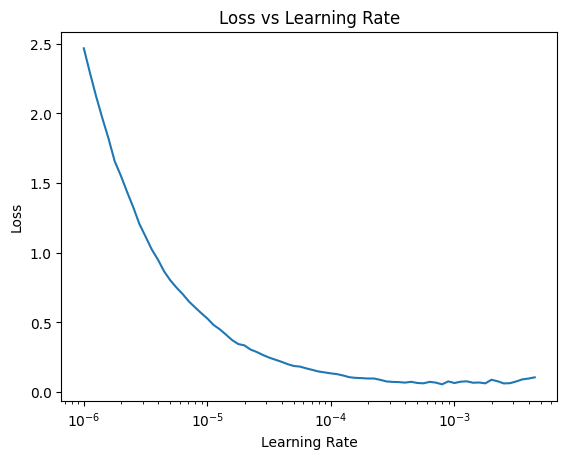

In [33]:
# Plot learning rate v loss

import matplotlib.pyplot as plt

# Plot values
plt.semilogx(history.history['learning_rate'], history.history['loss'])
#plt.axis([np.min(history.history['learning_rate']), np.max(history.history['learning_rate']), np.min(history.history['loss']), 700])

# Label plot
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Loss vs Learning Rate')

# Show plot
plt.show()

If the code is correct, you should see something similar to the following plot:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image17.png)

As the `Loss` decreased during training, the `Learning Rate` sped up.

#### **Plot `accuracy` and `val_accuracy`**

The code in the cell below plot's the `accuracy` and the `val_accuracy` recorded during each epoch in the training cycle. As you can see, the decrease in both the `accuracy` and the `val_accuracy` increase during training as the synaptic weights were adjusted to improve classification precision after each epoch.

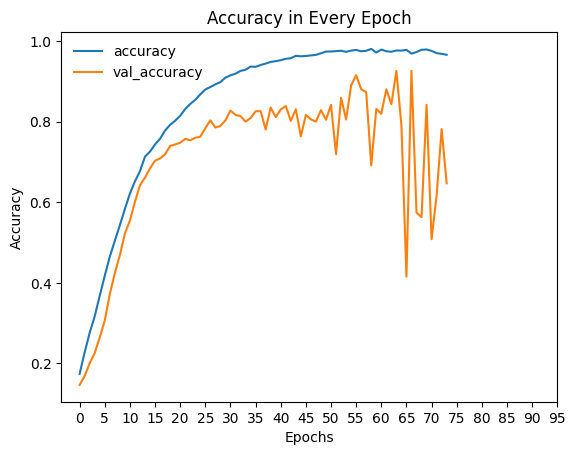

In [39]:
# Plot accuracy and val_accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], frameon=False)
plt.xticks(np.arange(0,100, 5))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy in Every Epoch')
plt.show()

If the code is correct, you should see the following table:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image18.png)

In training a neural network, `accuracy` and `val_accuracy` represent different performance metrics:

* **Accuracy:** This measures how well the model is performing on the training data. It calculates the percentage of correct predictions out of the total predictions made during training.

* **Val_accuracy:** This measures how well the model is performing on the validation data, which is separate from the training data. It calculates the percentage of correct predictions out of the total predictions made on the validation set. This metric helps you understand how well the model generalizes to new, unseen data.

In short, `accuracy` tells you how well the model is learning from the training data, while `val_accuracy` tells you how well the model is expected to perform on new data.

#### **Why is `val_accuracy` so erratic near the end of training?**

That's likely a sign of overfitting. When the model performs well on the training data (`accuracy`) but poorly on the validation data (`val_accuracy`), it means it's learning the noise and details in the training set rather than generalizing from the patterns.

Overfitting often results in unstable validation accuracy because the model's predictions are more influenced by the peculiarities of the training data, leading to fluctuating performance on new, unseen data. Reducing the complexity of the model, adding regularization techniques, or gathering more training data can help mitigate this.

### **Plot 4 Frames with Label**

The code in the cell below generates a 2 X 2 plot showing 4 images from the dataset along with their labels.

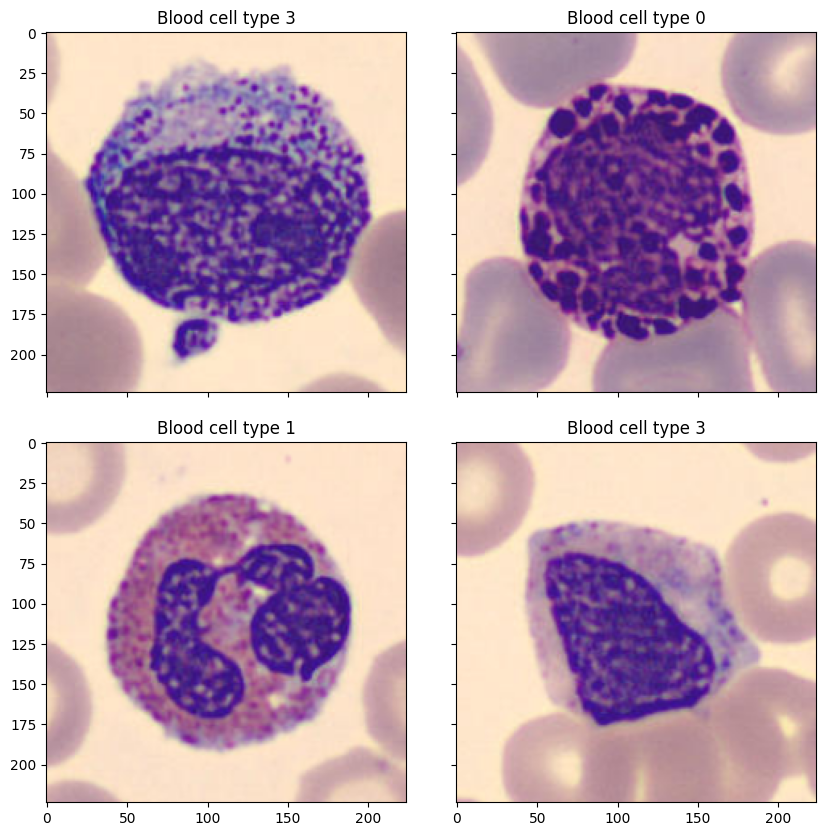

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# Set figure size
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

# Plot 4 images
for x in range(0,4):
    # grid[x].set_title('Blood cell type ' + str(test_labels[x]))
    grid[x].set_title('Blood cell type ' + str(np.argmax(test_labels[x])))
    grid[x].imshow(test_images[x])


If the code is correct, you should see something similar to the following:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image19.png)

The figure shows 4 pictures from the `test_images` with their blood cell type.

## **Classification Convolutional Neural Networks**

We will now look at an example of a  classification meural network. For _supervised_ computer vision, your dataset will need some labels. For classification, this label usually specifies _what_ the image is a picture of, e.g., dog, cat, carcinoma, etc.

For a classification neural network, we will provide an image and expect the neural network to classify it as being one of several posibilites. We will use the `bloodmnist_224` dataset that contains images of 8 different types of blood cells.

Here are images showing the 8 types of blood cells in the `bloodmnist_224` dataset

![___](https://biologicslab.co/BIO1173/images/class_06/BloodCellTypes_A.png)

Each image is 244 X 244 pixels with 3 color channels (RGB).

Our goal will be to create a convolutional neural network (CNN) that can classify a blood cell image into one of these 8 blood cell type classifications.


### **Step - 1: Setup Evironmental Variables**

**_Environmental variables_** are like hidden settings that tell your computer how to behave. They hold information that can affect how programs run on your system, such as paths to files, system directories, or user-specific settings. It's like setting the stage for your computer to know where to find all its props and scripts.

The code in the cell below creates environmental variables that are needed to download a specific datafile and then to extract this data into specific folders in your Colab notebook.

In [3]:
# Step - 1: Setup Environmental Variables

import os

# Define datafile location
URL = "https://biologicslab.co/BIO1173/data"
DOWNLOAD_SOURCE = URL+"/dermamnist_64.npz "
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print(f"DOWNLOAD_SOURCE {DOWNLOAD_SOURCE}")
print(f"DOWNLOAD_NAME {DOWNLOAD_NAME}")

# Define folder locations to store the data
PATH = "/content"
print(f"PATH {PATH}")
EXTRACT_TARGET = os.path.join(PATH,"dermamnist_64")
SOURCE = os.path.join(EXTRACT_TARGET)             # "crowd_counting")
print(f"EXTRACT_TARGET {EXTRACT_TARGET}")
print(f"SOURCE {SOURCE}")


DOWNLOAD_SOURCE https://biologicslab.co/BIO1173/data/dermamnist_64.npz 
DOWNLOAD_NAME dermamnist_64.npz 
PATH /content
EXTRACT_TARGET /content/dermamnist_64
SOURCE /content/dermamnist_64


If your code is correct, you should see the following output:

~~~text
DOWNLOAD_SOURCE https://biologicslab.co/BIO1173/data/dermamnist_64.npz
DOWNLOAD_NAME dermamnist_64.npz
PATH /content
EXTRACT_TARGET /content/dermamnist_64
SOURCE /content/dermamnist_64
~~~

You should be downloading a datafile called `dermamnist_64.np` from the course file server. You should then extract (unzip) its contents into a folder called `/content/dermamnist_64`.

### **Step - 2: Download and Extract Data**

In Step 1 we defined the file we wanted to download and the folder in which to place the data after we unzipped it. In the next cell we perform both the download and the extraction.

#### **Download File**

The code in the cell below uses this code chunk to download the datafile.
~~~text
!wget -O {os.path.join(PATH,DOWNLOAD_NAME)} {DOWNLOAD_SOURCE}
~~~

The program `wget` is a non-interactive network downloader commonly used in Unix-like operating systems. It retrieves files from the web using HTTP, HTTPS, and FTP protocols.

#### **Extract File Contents**

The datafile is compressed (i.e. a `zip file`), so we need to extract the file contents. The next code chunk unzips it to folder specified by the environmental variables defined above:
~~~text
!unzip -o -d {EXTRACT_TARGET} {os.path.join(PATH, DOWNLOAD_NAME)} >/dev/null
~~~
The command `unzip` is a command-line utility used to extract files from a ZIP archive.

At the end of the `unzip` command is `>/dev/null`. Normally, the `unzip` command prints out the name of every file that was extracted. Since there are 2,000 images, we don't want to see this print out. Instead the output is sent instead to `> dev/null` which hids the output. `dev/null` a special file that discards all data written to it—like a black hole for unnecessary or unwanted output. If you send a program’s output to /dev/null, it's basically saying, "I don't need this, just throw it away."

In [4]:
# Step - 2: Download datafile and extract it

print("Downloading files...")
!wget -O {os.path.join(PATH,DOWNLOAD_NAME)} {DOWNLOAD_SOURCE}
!mkdir -p {SOURCE}
!mkdir -p {TARGET}
!mkdir -p {EXTRACT_TARGET}
print(f"Extracting files...", end=' ')
!unzip -o -d {EXTRACT_TARGET} {os.path.join(PATH, DOWNLOAD_NAME)} >/dev/null
print("done.")

--2024-10-28 00:32:45--  https://biologicslab.co/BIO1173/data/dermamnist_64.npz
Resolving biologicslab.co (biologicslab.co)... 194.163.45.209
Connecting to biologicslab.co (biologicslab.co)|194.163.45.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100130190 (95M) [application/octet-stream]
Saving to: ‘/content/dermamnist_64.npz’

/content/dermamnist 100%[===================>]  95.49M  7.13MB/s    in 15s     

2024-10-28 00:33:01 (6.47 MB/s) - ‘/content/dermamnist_64.npz’ saved [100130190/100130190]

Extracting files... done.


If your code is correct, you should see the following output:

~~~text
Downloading files...
--2024-10-28 00:32:45--  https://biologicslab.co/BIO1173/data/dermamnist_64.npz
Resolving biologicslab.co (biologicslab.co)... 194.163.45.209
Connecting to biologicslab.co (biologicslab.co)|194.163.45.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100130190 (95M) [application/octet-stream]
Saving to: ‘/content/dermamnist_64.npz’

/content/dermamnist 100%[===================>]  95.49M  7.13MB/s    in 15s     

2024-10-28 00:33:01 (6.47 MB/s) - ‘/content/dermamnist_64.npz’ saved [100130190/100130190]

Extracting files... done.
~~~


### **Step - 3: Load Images and Labels into Numpy arrays**

Image data in dataset can be stored in different formats. In many cases, the image data is stored as individual pictures (frames) in a JPEG format or PNG format.

However, in this dataset, the images are stored in a collect of numpy arrays. The Numpy `.npy` format is a way to save Numpy arrays to disk in a binary file. This format stores the shape, data type, and data of the array efficiently, allowing for fast reading and writing making it perfect for handling large amounts of numerical data in a compact, easy-to-access way.

The code in the cell below reads the images and their corresponding labels using the Numpy command `np.load()` to create 6 numpy arrays containing the `training`, `test` and `validation` images and their labels.   

In [5]:
# Step - 3 Load images and labels into numpy arrays

import numpy as np

# Unpack train_images
train_images = np.load(os.path.join(SOURCE,"train_images.npy"),)
print(f"train_images: {train_images.shape}")
train_labels = np.load(os.path.join(SOURCE,"train_labels.npy"),)
print(f"train_labels: {train_labels.shape}")

# Unpack test_images
test_images = np.load(os.path.join(SOURCE,"test_images.npy"),)
print(f"test_images: {test_images.shape}")
test_labels = np.load(os.path.join(SOURCE,"test_labels.npy"),)
print(f"test_labels: {test_labels.shape}")

# Unpack val_images
val_images = np.load(os.path.join(SOURCE,"val_images.npy"),)
print(f"val_images: {val_images.shape}")
val_labels = np.load(os.path.join(SOURCE,"val_labels.npy"),)
print(f"val_labels: {val_labels.shape}")



train_images: (7007, 64, 64, 3)
train_labels: (7007, 1)
test_images: (2005, 64, 64, 3)
test_labels: (2005, 1)
val_images: (1003, 64, 64, 3)
val_labels: (1003, 1)


If your code is correct, you should see the following output:
~~~text
train_images: (7007, 64, 64, 3)
train_labels: (7007, 1)
test_images: (2005, 64, 64, 3)
test_labels: (2005, 1)
val_images: (1003, 64, 64, 3)
val_labels: (1003, 1)
~~~

### **Step - 4: One-Hote Encode Labels**

As you have learned previously, the Y-values for a classification neural network need to be **_One-Hot Encoded_** before they can be processed by a neural network. This is also true for image datasets. In this example, the Y-values are the labels.

The code in the cell below uses the Keras function `to_categorical()` to One-Hot Encode the label information for the training, testing and validation images.

In [6]:
# Step - 4: One-Hot encode labels

from tensorflow.keras.utils import to_categorical
import numpy as np

# Determine the number of classes
classes, counts = np.unique(test_labels, return_counts=True)
class_count = len(classes)
print(f"The label data contains {class_count} classes")

# One-Hot Encode
train_labels = to_categorical(train_labels, num_classes=class_count)
test_labels = to_categorical(test_labels, num_classes=class_count)
val_labels = to_categorical(val_labels, num_classes=class_count)

# Print shapes
print(f'Train Labels Shape: {train_labels.shape}')
print(f'Test Labels Shape: {test_labels.shape}')
print(f'Validation Labels Shape: {val_labels.shape}')


The label data contains 7 classes
Train Labels Shape: (7007, 7)
Test Labels Shape: (2005, 7)
Validation Labels Shape: (1003, 7)


If your code is correct, you should see the following output:
~~~text
The label data contains 7 classes
Train Labels Shape: (7007, 7)
Test Labels Shape: (2005, 7)
Validation Labels Shape: (1003, 7)
~~~

After One-Hot Encoding, there are now 7 classification types.

### **Step - 5: Create and Compile CNN neural network model**

The code in the cell below builds a classic **_Convolutional Neural Network (CNN) model_**.

#### **Create CNN model**

Here is a summary of the model:

1. **Conv2D Layer:** 64 filters, kernel size 3x3, using ReLU activation, input shape is 480x640x3.
2. **MaxPool2D Layer:** Reduces spatial dimensions by a factor of 2.
3. **Conv2D Layer:** 128 filters, kernel size 3x3, using ReLU activation.
4. **MaxPool2D Layer:** Another spatial dimension reduction.
5. **Dropout Layer:** Drops 20% of neurons to prevent overfitting.
6. **Flatten Layer:** Converts the 2D matrix data to a vector.
7. **Dense Layer:** Fully connected layer with 128 neurons, using ReLU activation.
8. **Dense Layer:** Output layer with 8 neurons, one for each category.

#### **Model Compiler**

Here is the code used to compile the model:

~~~text
# Compile model
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
~~~
This code is setting up how the model will learn. It’s basically telling your model how to play a game and how to keep score:

* **loss=keras.losses.CategoricalCrossentropy():** CategoricalCrossentropy is a loss function used in classification tasks where the target labels are one-hot encoded (i.e., each label is represented as a binary vector). It measures the difference between the predicted probability distribution and the true distribution (the one-hot encoded labels). In simpler terms, it penalizes the model more when it assigns higher probabilities to incorrect classes and lower probabilities to the correct class. This helps guide the model to improve its predictions, making it more accurate over time. It's crucial for tasks like image classification, where you need the model to predict distinct classes with high confidence

* **optimizer=keras.optimizers.Adam():** You're using the `Adam` optimizer to adjust the model's weights. `Adam` is known for being efficient and well-suited for large datasets or parameters.

* **metrics=['accuracy']:** Setting metrics=['accuracy'] means that during training, the model will track and display `accuracy` as an evaluation metric. Accuracy is the proportion of correct predictions among the total number of predictions made. It’s a straightforward way to gauge how well your model is performing. So, with metrics=['accuracy'], Keras will show you how often your model’s predictions match the true labels as it trains.

In [8]:
# Insert your code for Step -5 here

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define variables
input_dim = (64, 64, 3)

# Create CNN model
model = Sequential([
    # Input Layer
    Input(shape=input_dim),

    # 1st Convolution layer
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # 2nd Convolution layer
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    # 3rd Convolution layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    # 4th Convolution layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    # 5th Convolution layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.2),

    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    BatchNormalization(),

    # Output layer has neurons equal to class_count
    Dense(class_count, activation='softmax')
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 64)            │              

 Total params: 235,623 (920.40 KB)

 Trainable params: 234,119 (914.53 KB)

 Non-trainable params: 1,504 (5.88 KB)

If the code is correct, you should see something similar to the following output:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image46.png)



### **Step - 6: Create Callback Monitors**

The code in the cell below creates two different **_callback monitors_**. A Keras callback monitor tracks specific metrics or quantities during the training process and allows you to take action based on their values. It's like having a smart assistant that keeps an eye on how well your model is performing. These callbacks help make the training process more efficient and adaptive by reacting to the monitored metrics in real-time.

#### **Keras Learning Rate Scheduler**

The Keras learning rate scheduler dynamically adjusts the learning rate during training based on a predefined schedule or function. This helps the model converge more efficiently by adapting the learning rate as needed.

Here is the code for the learning rate monitor:
~~~text
# Add learning rate monitor
l_rate_monitor = keras.callbacks.LearningRateScheduler(
                lambda epochs : 1e-6 * 10 ** (epochs/20))
~~~

This code snippet creates a learning rate scheduler to adjust the learning rate during training. Here's a summary:

* **keras.callbacks.LearningRateScheduler:** This callback adjusts the learning rate according to a given schedule.
* **lambda epochs : (epochs/20):** This is the function that defines how the learning rate changes over epochs. It starts with a very low learning rate (1e-8) and increases it exponentially based on the formula:

$$ 1 \times 10^{-6} \cdot 10^{\frac{\text{epochs}}{20}} $$

In essence, this dynamically adjusts the learning rate to help the model converge more efficiently by starting slow and gradually speeding up as training progresses.

#### **Early Stopping**

Here is the early stopping monitor:

~~~text

# Create early stopping monitor
e_stop_monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10,
                 verbose=1, mode='auto', restore_best_weights=True)
~~~

This snippet is configuring the EarlyStopping callback in Keras, which helps prevent overfitting by stopping the training once the model’s performance stops improving. Here's a breakdown:

* **monitor='val_loss':** Watches the validation loss to decide when to stop training.
* **min_delta=1e-3:** The minimum change in the monitored quantity to qualify as an improvement. In this case, 0.001.
* **patience=10:** Number of epochs with no improvement after which training will be stopped. Here, it's set to 10 epochs.
* **verbose=1:** Provides updates in the console about the training process.
* **mode='auto':** Automatically decides if it should look for an increase or decrease in the monitored metric.
* **restore_best_weights=True:** After stopping, the model will revert to the weights that achieved the best validation loss.

In [10]:
# Insert your code for Step - 6 here

import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler


# Create learning rate monitor
l_rate_monitor = keras.callbacks.LearningRateScheduler(lambda epochs : 1e-6 * 10 ** (epochs/20))

# Create early stopping monitor
e_stop_monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10,
                 verbose=1, mode='auto', restore_best_weights=True)

If the code ran correctly, no output would be generated.

### **Step - 7: Train the Neural Network**

Training (`model.fit()`) takes the greatest amount of time and computer power. The code in the cell below trains the neural network model on the training data and monitors its performance on the validation data.

The two most important variables that you can change is the maximum number of **_epochs_** to train the model and the **_batch size_**. The code in the cell below is set to train the neural network for a maximum of 100 epochs. This is an upper limit since the training includes an _early stopping monitor_ to stop training if overfitting is detected.

Here's the summary:

* **model.fit(train_images, train_labels, ...):** This is the method to train the model.
* **validation_data=(test_images, test_labels):** This is the data the model will use to validate its learning after each epoch (one complete pass through the training data).
* **epochs=EPOCHS:** This specifies the number of times the training process will iterate over the entire dataset.
* **batch_size=BATCH_SIZE:** This sets the number of samples that will be propagated through the network at once. Smaller batches mean more updates per epoch but higher computation cost. Your GPU or TPU can limit batch xize; larger batches require more memory. In practice, a batch size of 32, 64, of 128 are good places to start.
* **steps_per_epoch:** A good value for steps_per_epoch depends on the size of your training dataset and batch size. As a rule of thumb, it’s often set to the total number of training samples divided by the batch size:

$$ \text{steps_per_epoch} = \frac{\text{number of training samples}}{\text{batch size}} $$

+ since the number of training samples approximately 1200 and the batch size is set to 64, the `steps_per_bactch` is set to ``188`.

* **callbacks=[e_stop_monitor,lr_monitor]:** This uses a callback function to implement early stopping as well as to monitor and possibly adjust the learning rate during training, helping the model to learn more effectively.

All these elements together help the model learn from the training data, while checking its performance and making adjustments based on the validation data.

#### **IMPORTANT NOTICE: How Long Training Will Take Depends on the GPU/TPU**

The types of GPUs and TPUs that are available in Colab vary over time. This is necessary for Colab to be able to provide access to these resources free of charge. Even with a paid subscription, there are limits on how much time you can use any of the GPU/TPUs.

When running the next cell using one of Colab's least powerful GPU/TPU accelerator, the **A100 GPU**, running 100 epochs only required 4 minutes. Using the Colab CPU instead, The same neural network required more than **_4_** hours to train!

In [ ]:
# Insert your code for Step - 7 here

import time
import tensorflow as tf

# Set variables
EPOCHS = 100
BATCH_SIZE = 64
STEPS_PER_EPOCH = 110

# Record start time
start_time = time.time()

# Print header
print(f"----- Training is starting for {EPOCHS} epochs, batch size: {BATCH_SIZE}, steps per epoch: {STEPS_PER_EPOCH}, runtime GPU/TPU: {my_GPU} --------------")

# Train the model
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    callbacks=[e_stop_monitor, l_rate_monitor])


# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")


----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 110, runtime GPU/TPU: CPU --------------
Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.1310 - loss: 2.7146 - val_accuracy: 0.0494 - val_loss: 2.0899 - learning_rate: 1.0000e-06
Epoch 2/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0494 - val_loss: 2.0899 - learning_rate: 1.1220e-06
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.1386 - loss: 2.6699 - val_accuracy: 0.1616 - val_loss: 1.9066 - learning_rate: 1.2589e-06
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1616 - val_loss: 1.9066 - learning_rate: 1.4125e-06
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.1369 - loss: 2.6093 - val_accuracy: 0.2479 - val_loss: 1.8469 - learning_rate: 1.5849e-06
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2479 - val_loss: 1.8469 - learning_rate: 1.7783e-06
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.1412 - loss: 2.5911 - val_accuracy: 0.2858 - val_loss: 1.8436 - learning_rate: 1.9953e-06
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━

Your output should be similar to the following:

The first 5 Epochs:
~~~text
----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 188, runtime GPU/TPU: A100 --------------
Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.1571 - loss: 2.5204 - val_accuracy: 0.1464 - val_loss: 2.2210 - learning_rate: 1.0000e-06
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2185 - loss: 2.3401 - val_accuracy: 0.1687 - val_loss: 2.1330 - learning_rate: 1.1220e-06
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2606 - loss: 2.1677 - val_accuracy: 0.2005 - val_loss: 1.9822 - learning_rate: 1.2589e-06
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3035 - loss: 2.0179 - val_accuracy: 0.2257 - val_loss: 1.8878 - learning_rate: 1.4125e-06
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3534 - loss: 1.8826 - val_accuracy: 0.2643 - val_loss: 1.7836 - learning_rate: 1.5849e-06
~~~

The last 2 Epochs
~~~text
Epoch 73/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9666 - loss: 0.1013 - val_accuracy: 0.7819 - val_loss: 0.9146 - learning_rate: 0.0040
Epoch 74/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9688 - loss: 0.0970 - val_accuracy: 0.6472 - val_loss: 1.7201 - learning_rate: 0.0045
Epoch 74: early stopping
Restoring model weights from the end of the best epoch: 64.
Elapsed time: 0:03:58.33
~~~


## **Evaluating Model's Training**

Now that we have trained our model, let's look at how it changed during its training.

#### **How Did the Learning Rate Change?**

Run the next cell to print out the maximum and minimum values of the model's learning rate during training. You should note that when training was started (i.e. epoch 1), the rate was set to `learning_rate (1e-8)`.

In [ ]:
print(f"Minimum learning rate: {np.min(history.history['learning_rate'])}")
print(f"Maximum learning rate: {np.max(history.history['learning_rate'])}")
print(f"Minimum loss: {np.min(history.history['loss'])}")

Minimum learning rate: 9.999999974752427e-07
Maximum learning rate: 0.004466835875064135
Minimum loss: 0.05373129993677139


If the code is correct, you should see the following output:

~~~text
Minimum learning rate: 9.999999974752427e-07
Maximum learning rate: 0.004466835875064135
Minimum loss: 0.05373129993677139
~~~

The minimum learning rate is essentially `1e-6`.

To compare these two numbers:

$$ 0.004466835875064135 \text{ and } 9.99999993922529 \times 10^-7$$

We divide the first number by the second:

$$ 0.004466835875064135 \div \left(9.99999993922529 \times 10^{-7}\right) \approx 4467 $$

So, in this particular training trial, the learning rate increased about **4,500** times faster than when it started.

#### **Plot Learning Rate vs Loss**

The code in the cell below plots learing rate versus loss that occurred during training.

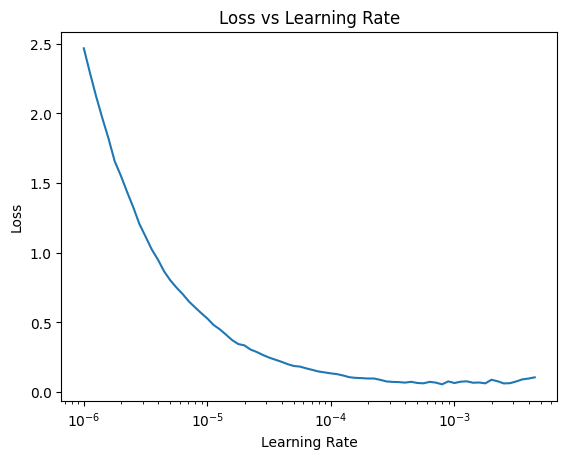

In [ ]:
# Plot learning rate v loss

import matplotlib.pyplot as plt

# Plot values
plt.semilogx(history.history['learning_rate'], history.history['loss'])
#plt.axis([np.min(history.history['learning_rate']), np.max(history.history['learning_rate']), np.min(history.history['loss']), 700])

# Label plot
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Loss vs Learning Rate')

# Show plot
plt.show()

If the code is correct, you should see something similar to the following plot:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image17.png)

As the `Loss` decreased during training, the `Learning Rate` sped up.

#### **Plot `accuracy` and `val_accuracy`**

The code in the cell below plot's the `accuracy` and the `val_accuracy` recorded during each epoch in the training cycle. As you can see, the decrease in both the `accuracy` and the `val_accuracy` increase during training as the synaptic weights were adjusted to improve classification precision after each epoch.

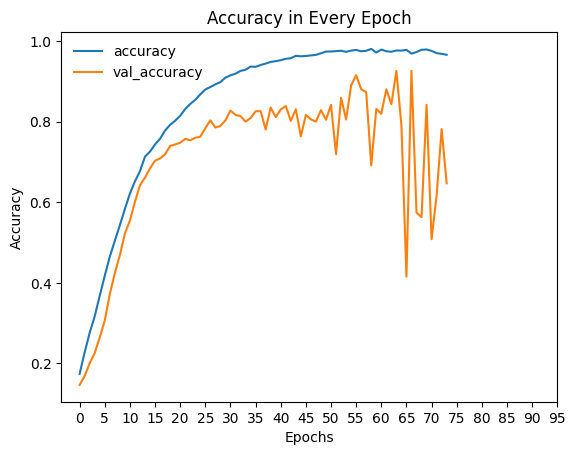

In [ ]:
# Plot accuracy and val_accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], frameon=False)
plt.xticks(np.arange(0,100, 5))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy in Every Epoch')
plt.show()

If the code is correct, you should see the following table:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image18.png)

In training a neural network, `accuracy` and `val_accuracy` represent different performance metrics:

* **Accuracy:** This measures how well the model is performing on the training data. It calculates the percentage of correct predictions out of the total predictions made during training.

* **Val_accuracy:** This measures how well the model is performing on the validation data, which is separate from the training data. It calculates the percentage of correct predictions out of the total predictions made on the validation set. This metric helps you understand how well the model generalizes to new, unseen data.

In short, `accuracy` tells you how well the model is learning from the training data, while `val_accuracy` tells you how well the model is expected to perform on new data.

#### **Why is `val_accuracy` so erratic near the end of training?**

That's likely a sign of overfitting. When the model performs well on the training data (`accuracy`) but poorly on the validation data (`val_accuracy`), it means it's learning the noise and details in the training set rather than generalizing from the patterns.

Overfitting often results in unstable validation accuracy because the model's predictions are more influenced by the peculiarities of the training data, leading to fluctuating performance on new, unseen data. Reducing the complexity of the model, adding regularization techniques, or gathering more training data can help mitigate this.

### **Plot 4 Frames with Label**

The code in the cell below generates a 2 X 2 plot showing 4 images from the dataset along with their labels.

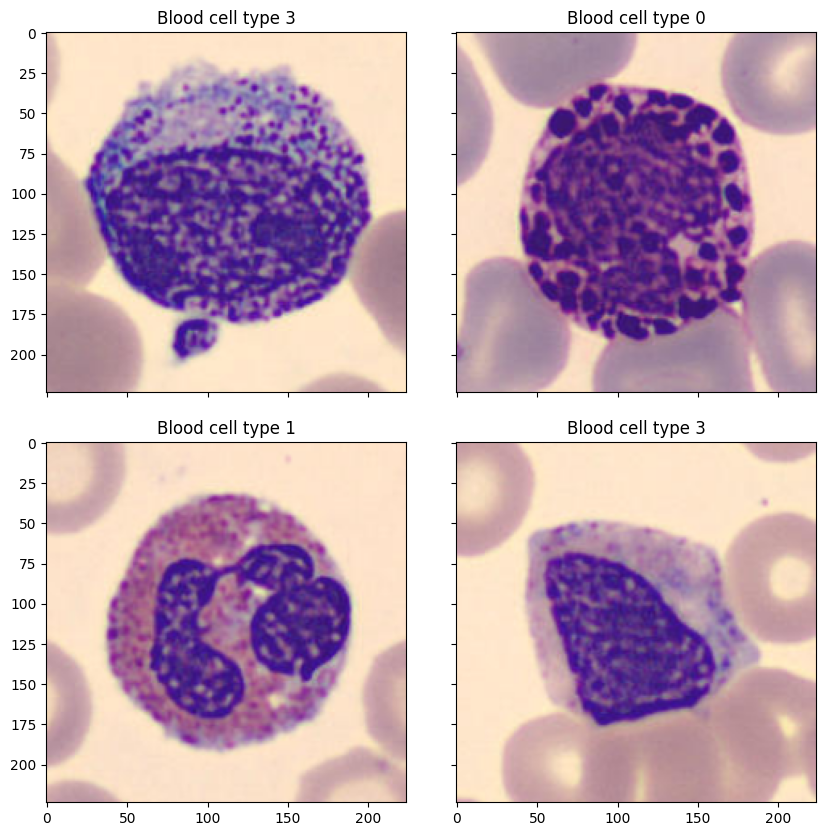

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# Set figure size
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

# Plot 4 images
for x in range(0,4):
    # grid[x].set_title('Blood cell type ' + str(test_labels[x]))
    grid[x].set_title('Blood cell type ' + str(np.argmax(test_labels[x])))
    grid[x].imshow(test_images[x])


If the code is correct, you should see something similar to the following:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image19.png)

The figure shows 4 pictures from the `test_images` with their blood cell type.

On my Windows machine, 50 epochs required between 2-4 minutes.


# Other Resources

* [Imagenet:Large Scale Visual Recognition Challenge 2014](http://image-net.org/challenges/LSVRC/2014/index)
* [Andrej Karpathy](http://cs.stanford.edu/people/karpathy/) - PhD student/instructor at Stanford.
* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/) - Stanford course on computer vision/CNN's.
* [CS231n - GitHub](http://cs231n.github.io/)
* [ConvNetJS](http://cs.stanford.edu/people/karpathy/convnetjs/) - JavaScript library for deep learning.

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_06_1.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.